In [54]:
import pandas as pd 
import numpy as np
import warnings as wr 
wr.filterwarnings('ignore') 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [3]:
df1=df.copy()
df2=df.copy()
df3=df.copy()

In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [5]:
df.Gender = le.fit_transform(df[['Gender']])

In [6]:
df.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


In [7]:
df.tail()

,Gender,Height,Weight
8550,0,60.483946,110.565497
8551,0,63.423372,129.921671
8552,0,65.584057,155.942671
8553,0,67.429971,151.678405
8554,0,60.921791,131.253738


# Go Ahead

# EDA

In [8]:
df.shape

(8555, 3)

In [9]:
df.info

<bound method DataFrame.info of       Gender     Height      Weight
0          1  73.847017  241.893563
1          1  68.781904  162.310473
2          1  74.110105  212.740856
3          1  71.730978  220.042470
4          1  69.881796  206.349801
...      ...        ...         ...
8550       0  60.483946  110.565497
8551       0  63.423372  129.921671
8552       0  65.584057  155.942671
8553       0  67.429971  151.678405
8554       0  60.921791  131.253738

[8555 rows x 3 columns]>

In [10]:
df

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801
...,...,...,...
8550,0,60.483946,110.565497
8551,0,63.423372,129.921671
8552,0,65.584057,155.942671
8553,0,67.429971,151.678405


### Manual Calculation with Formula

In [11]:
x=df['Height']
y=df['Weight']
print(f'x={x.head()} and \n y={y.head()}')

x=0    73.847017
1    68.781904
2    74.110105
3    71.730978
4    69.881796
Name: Height, dtype: float64 and 
 y=0    241.893563
1    162.310473
2    212.740856
3    220.042470
4    206.349801
Name: Weight, dtype: float64


In [12]:
mean_x=np.mean(x)
mean_y=np.mean(y)
print(f' Mean of x={mean_x:.2f} and Mean of y={mean_y:.2f}')

 Mean of x=66.81 and Mean of y=165.63


In [13]:
dev_x=x-mean_x
dev_y=y-mean_y
print(f'deviation of x=\n{dev_x.head()} \n and deviation of y=\n{dev_y.head()}')

deviation of x=
0    7.037092
1    1.971979
2    7.300180
3    4.921053
4    3.071871
Name: Height, dtype: float64 
 and deviation of y=
0    76.260828
1    -3.322263
2    47.108120
3    54.409735
4    40.717065
Name: Weight, dtype: float64


In [14]:
m=np.sum(dev_x * dev_y)/np.sum(dev_x**2)  # Here m is equivalent of coeficient value
print(f' the value of coefficient, m = {m:.4f}')

 the value of coefficient, m = 7.6791


In [15]:
c=mean_y-m*mean_x  #Here c is equivalent of intercept value
print(f' the value of intercept, c = {c:.4f}')

 the value of intercept, c = -347.4082


In [16]:
y_pred= m * x + c
y_pred.head()

0    219.671351
1    180.775782
2    221.691636
3    203.422054
4    189.221974
Name: Height, dtype: float64

In [17]:
y.head()

0    241.893563
1    162.310473
2    212.740856
3    220.042470
4    206.349801
Name: Weight, dtype: float64

In [18]:
residual=y-y_pred
residual.head()

0    22.222212
1   -18.465310
2    -8.950781
3    16.620416
4    17.127826
dtype: float64

In [19]:
MAE=np.mean(abs(residual))
print(f'the value of mean absolute error (MAE) = {MAE:.4f}')

the value of mean absolute error (MAE) = 9.7958


In [20]:
MSE=np.mean(residual**2)
print(f'the value of mean squared error (MSE) = {MSE:.4f}')

the value of mean squared error (MSE) = 152.0702


In [21]:
#Equation for the calculation of coefficient of determination or 
#regression performance score or R2 is R2=1-(SSR/SST)
#where SSR= Residual Sum of Square and SST=Total Sum of Square
# SSR= (y-y_pred)2 and SST=(y-y_mean)2

In [22]:
y_mean=np.mean(y)
y_mean

np.float64(165.6327353266768)

In [23]:
SST=np.sum((y-y_mean)**2)
SST

np.float64(8783357.983392542)

In [24]:
SSR=np.sum(residual**2)
SSR

np.float64(1300960.7270091348)

In [25]:
ols_score_R2=1-(SSR/SST)
ols_score_R2

np.float64(0.8518834448659642)

In [26]:
#The performance score for manual calculation is 0.85

# Least Squared Linear Regression

In [27]:
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt

In [28]:
df1.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
le1=LabelEncoder()

In [31]:
df1['Gender']=le1.fit_transform(df1['Gender'])

In [32]:
df1.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


In [33]:
x1=df1.drop(['Weight'], axis=1)
x1.head()

,Gender,Height
0,1,73.847017
1,1,68.781904
2,1,74.110105
3,1,71.730978
4,1,69.881796


In [34]:
y1=df1['Weight']
y1.head()

0    241.893563
1    162.310473
2    212.740856
3    220.042470
4    206.349801
Name: Weight, dtype: float64

In [35]:
x1.shape

(8555, 2)

In [36]:
y1.shape

(8555,)

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
x1train,x1test,y1train,y1test = train_test_split (x1,y1, train_size=.7, random_state=85)

In [39]:
x1train.head()

,Gender,Height
5951,0,62.643517
8542,0,65.487640
8026,0,64.699058
1102,1,72.716166
2948,1,65.540303


In [40]:
x1train.shape

(5988, 2)

In [41]:
reg1=LinearRegression()

In [42]:
reg1.fit(x1train,y1train)

LinearRegression()

In [43]:
y1_pred=reg1.predict(x1test)  # This is the predicted value of y for test data
np.array(y1_pred)

array([162.46771204, 190.24321284, 162.34924395, ..., 176.65666415,
       118.86585748, 175.04650446], shape=(2567,))

In [44]:
np.array(y1test)  # This is the actual data of y for test data

array([181.0938696, 180.7144438, 159.1951056, ..., 173.1055488,
       117.1695591, 175.4521677], shape=(2567,))

In [45]:
reg1.score(x1test,y1test) # This is the performance score for test data

0.9010622976153826

In [46]:
reg1.score(x1train,y1train) # This is the performance score for training data

0.8994719999066728

In [47]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [48]:
MAE_1= mean_absolute_error(y1test, y1_pred)
MAE_1

8.008296141690462

In [49]:
MSE_1= mean_squared_error(y1test, y1_pred)
MSE_1

103.15660881241995

In [50]:
m1=reg1.coef_
print(f' the value of coefficient, m = {m1}')

 the value of coefficient, m = [19.50787138  5.97684649]


In [51]:
coef_gender=reg1.coef_[0]
coef_height=reg1.coef_[1]
print(f' the coefficient for gender={coef_gender:.2f} and height={coef_height:.2f}')

 the coefficient for gender=19.51 and height=5.98


In [52]:
c1=reg1.intercept_
print(f' the value of intercept, c = {c1}')

 the value of intercept, c = -245.12482424934953


Text(0.05, 0.95, 'Weight (y) = 19.51·Gender + 5.98·Height +-245.12')

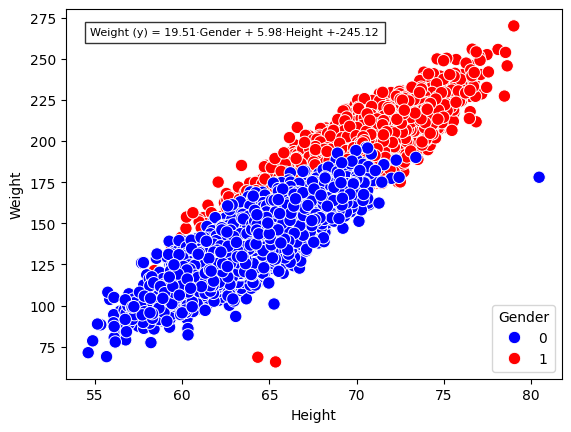

In [56]:
equation = f"Weight (y) = {coef_gender:.2f}·Gender + {coef_height:.2f}·Height +{c1:.2f}"

sns.scatterplot(x='Height', y='Weight', hue='Gender', data=df1, s=80, palette=['blue', 'red'])

plt.text(0.05, 0.95, equation, transform=plt.gca().transAxes, 
         fontsize=8, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.8))

In [57]:
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

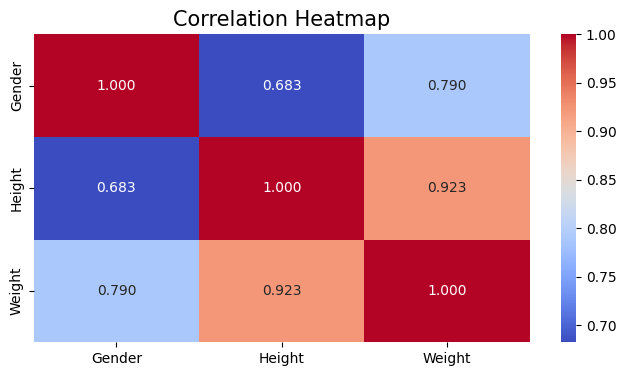

In [58]:
plt.figure(figsize=(8, 4)) 

sns.heatmap(df1.select_dtypes(include=['number']).corr(), 
            annot=True,        # Annotate with correlation values
            fmt=".3f",         # Format the correlation values
            cmap='coolwarm',   # Choose a color map
            cbar=True)         # Display the color bar

plt.title('Correlation Heatmap', fontsize=15)
plt.show()

# Logistic Regression

In [59]:
df3.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [60]:
from sklearn.preprocessing import LabelEncoder

In [61]:
le3=LabelEncoder()

In [62]:
df3.Gender=le3.fit_transform(df3['Gender'])
df3.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


In [63]:
x3=df3.drop(['Gender'], axis=1)
x3.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [64]:
y3=df3['Gender']
y3.head()

0    1
1    1
2    1
3    1
4    1
Name: Gender, dtype: int64

In [65]:
x3.shape

(8555, 2)

In [66]:
y3.shape

(8555,)

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
x3train,x3test,y3train,y3test = train_test_split(x3,y3, train_size=.70, random_state=85)

In [69]:
x3train.shape

(5988, 2)

In [70]:
from sklearn.linear_model import LogisticRegression

In [71]:
lg3_reg = LogisticRegression()

In [72]:
lg3_reg.fit(x3train,y3train)

LogisticRegression()

In [73]:
y3_pred=lg3_reg.predict(x3test) #This is the predicted data for y which is called yhat.
y3_pred

array([1, 1, 1, ..., 1, 0, 1], shape=(2567,))

In [74]:
np.array(y3test)   # This is original data of y

array([1, 1, 1, ..., 1, 0, 1], shape=(2567,))

In [75]:
y3_prob=lg3_reg.predict_proba(x3test) [:, 1]
y3_prob

array([0.99213236, 0.93225425, 0.65484486, ..., 0.90100613, 0.0037522 ,
       0.94176866], shape=(2567,))

In [76]:
lg3_reg.score(x3train,y3train)  # This is the training score

0.9178356713426854

In [77]:
lg3_reg.score(x3test,y3test)  # This is the testing score

0.9170237631476431

In [78]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [79]:
mae_lg3= mean_absolute_error (y3test,y3_pred)
mae_lg3

0.08297623685235683

In [80]:
mse_lg3= mean_squared_error (y3test,y3_pred)
mse_lg3

0.08297623685235683

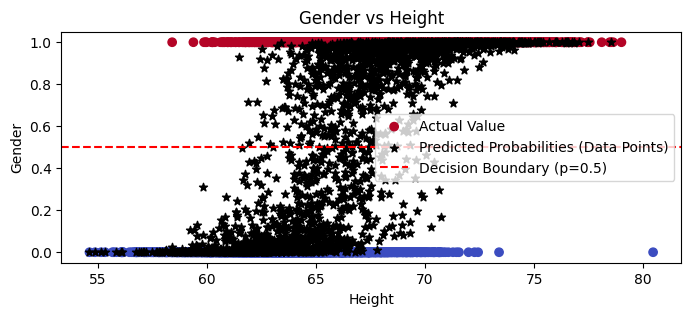

In [81]:
plt.figure(figsize=(8, 3))

plt.scatter(x3['Height'],y3, c=y3, cmap='coolwarm', label='Actual Value' )
plt.scatter(x3test ['Height'], y3_prob, color='black', marker='*', label="Predicted Probabilities (Data Points)")

plt.axhline(0.5, color='red', linestyle='--', label="Decision Boundary (p=0.5)")
plt.title("Decision Boundary Based on Actual Data")

plt.xlabel('Height')
plt.ylabel('Gender')
plt.title('Gender vs Height')
plt.legend()
plt.show()

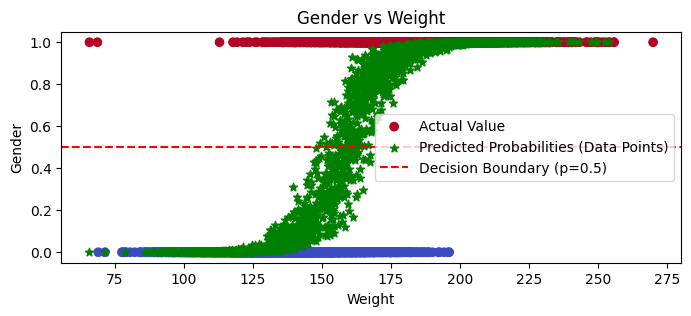

In [82]:
plt.figure(figsize=(8, 3))

plt.scatter(x3['Weight'],y3, c=y3, cmap='coolwarm', label='Actual Value' )
plt.scatter(x3test['Weight'], y3_prob, color='green', marker='*', label="Predicted Probabilities (Data Points)")

plt.axhline(0.5, color='red', linestyle='--', label="Decision Boundary (p=0.5)")
plt.title("Decision Boundary Based on Actual Data")

plt.xlabel('Weight')
plt.ylabel('Gender')
plt.title('Gender vs Weight')
plt.legend()
plt.show()

# Regression Problem (KNN Regression)

In [83]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [84]:
kn_reg=KNeighborsRegressor()

In [85]:
df=pd.read_csv('weight-height.csv')

In [86]:
x=df.drop(['Weight'], axis=1)
x.head()

,Gender,Height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


In [87]:
x.shape

(8555, 2)

In [88]:
y=df['Weight']
y.head()

0    241.893563
1    162.310473
2    212.740856
3    220.042470
4    206.349801
Name: Weight, dtype: float64

In [89]:
y.shape

(8555,)

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=.70,random_state=85)

In [92]:
xtrain.shape

(5988, 2)

In [93]:
xtrain.head()

,Gender,Height
5951,Female,62.643517
8542,Female,65.487640
8026,Female,64.699058
1102,Male,72.716166
2948,Male,65.540303


In [94]:
xtest.shape

(2567, 2)

In [95]:
xtest.head()

,Gender,Height
265,Male,64.931342
3281,Male,69.578525
2579,Male,64.911521
8070,Female,65.061414
1781,Male,67.197511


In [96]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [97]:
xtrain['Gender'] = le.fit_transform(xtrain['Gender'])
xtest['Gender'] = le.fit_transform(xtest['Gender'])

In [98]:
xtrain.head()

,Gender,Height
5951,0,62.643517
8542,0,65.487640
8026,0,64.699058
1102,1,72.716166
2948,1,65.540303


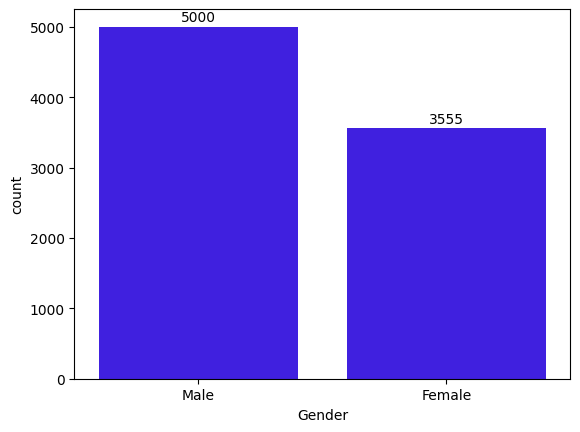

In [99]:
sns.countplot(data=df, x=df['Gender'], color='#2B00FF')

for p in plt.gca().patches:                     #gca=get current axis #patches are the bars
    plt.text(p.get_x() + p.get_width() / 2,     # x-coordinate
    p.get_height() + 80,                        # y-coordinate
    int(p.get_height()),                        # The count value
    ha='center')                                # Center alignment  #ha=horizontal axis

plt.show()

In [100]:
kn_reg = KNeighborsRegressor(n_neighbors=5, weights="distance")

In [101]:
kn_reg.fit(xtrain,ytrain)

KNeighborsRegressor(weights='distance')

In [102]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [103]:
y_pred=kn_reg.predict(xtest)
y_pred

array([155.08600971, 193.04856918, 156.11147897, ..., 178.4263212 ,
       124.2212905 , 174.46212113], shape=(2567,))

In [104]:
mae_kn=mean_absolute_error(ytest,y_pred)
mae_kn

9.509379897255492

In [105]:
y_predt=kn_reg.predict(xtrain) #To check the impact of train data on mae or mse. But this is not done normally.
y_predt

array([142.8873793, 146.0601563, 147.2045478, ..., 151.7352353,
       183.4542292, 207.5399095], shape=(5988,))

In [106]:
mae_knt=mean_absolute_error(ytrain,y_predt) #To check the impact of train data on mae or mse. But this is not done normally.
mae_knt                                     #the output is 0.0 which means there is no error.

0.0

In [107]:
mse_kn=mean_squared_error(ytest,y_pred)
mse_kn

145.36498497618578

In [108]:
kn_reg.score(xtest,ytest)

0.8605801626644143

In [109]:
kn_reg.score(xtrain,ytrain) # To evaluate the training impact on score performance. However, this is not check usually

1.0

# Classification Problem (KNN Classification)

In [110]:
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [111]:
df2.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [112]:
le2=LabelEncoder()

In [113]:
df2.Gender=le2.fit_transform(df2['Gender'])
df2.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


In [114]:
x2=df2.drop('Gender', axis=1)
x2.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [115]:
x2.shape

(8555, 2)

In [116]:
y2=df2[['Gender']]
y2.head()

,Gender
0,1
1,1
2,1
3,1
4,1


In [117]:
from sklearn.model_selection import train_test_split

In [118]:
x2train,x2test,y2train,y2test= train_test_split(x2,y2, train_size=.70, random_state=85)

In [119]:
x2train

,Height,Weight
5951,62.643517,142.887379
8542,65.487640,146.060156
8026,64.699058,147.204548
1102,72.716166,195.356431
2948,65.540303,145.913545
...,...,...
1573,73.358437,217.389545
5715,61.831440,144.912759
6708,67.008187,151.735235
1587,68.248443,183.454229


In [120]:
kn_cls=KNeighborsClassifier(n_neighbors=5)

In [121]:
kn_cls.fit(x2train, y2train)  # y_train contains class labels

KNeighborsClassifier()

In [122]:
kn_cls.score(x2train,y2train)

0.9295257181028724

In [123]:
kn_cls.score(x2test,y2test)

0.9104012465913518

In [124]:
y2_pred=kn_cls.predict(x2test)
y2_pred

array([1, 1, 1, ..., 1, 0, 1], shape=(2567,))

In [125]:
y2test.head()

,Gender
265,1
3281,1
2579,1
8070,0
1781,1


In [126]:
#y_pred = knn_classifier.predict(X_test)  # Predicted class labels

In [127]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [128]:
mea_kn_cls= mean_absolute_error(y2test,y2_pred)
mea_kn_cls

0.08959875340864823

In [129]:
mse_kn_cls= mean_squared_error(y2test,y2_pred)
mse_kn_cls

0.08959875340864823

# Comparison of Linear Rgeression and KNN Regressor

In [130]:
#plot

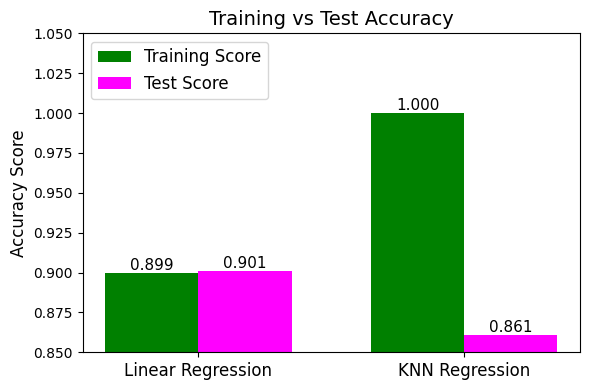

In [181]:
import numpy as np
import matplotlib.pyplot as plt

reg_models = ['Linear Regression', 'KNN Regression']
test_scores = [0.90106, 0.86058 ]
train_scores = [0.89947, 1.00000]

plt.figure(figsize=(6,4))
#Accuracy Score
x = np.arange(len(reg_models))
width = 0.35   #Sets the width of each bar to 0.35 units (to prevent overlapping).
bars1 = plt.bar(x - width/2, train_scores, width, label='Training Score', color='green') # x - width/2: Positions bars left of center.train_scores: Heights of the bars (your training accuracy values).
bars2 = plt.bar(x + width/2, test_scores, width, label='Test Score', color='magenta') # x + width/2: Positions bars right of center.test_scores: Heights of the bars (your test accuracy values).

plt.ylabel('Accuracy Score', fontsize=12)  #Labels the y-axis as "Accuracy Score" with font size 12.
plt.title('Training vs Test Accuracy', fontsize=14)
plt.xticks(x, reg_models, fontsize=12) # Places the model names (['Linear Regression', 'KNN Regression']) at positions x = [0, 1] on the x-axis.
plt.ylim(0.85, 1.05)     #Sets the y-axis range from 0.85 to 0.95 
plt.legend(fontsize=12)

for bar in bars1 + bars2:
    height = bar.get_height()                          #bar.get_height(): Gets the MAE value for the current bar.
    plt.text(bar.get_x() + bar.get_width()/2., height, #bar.get_x() + bar.get_width()/2.: Calculates the center of the bar.
             f'{height:.3f}',
             ha='center', va='bottom', fontsize=11)


plt.tight_layout()

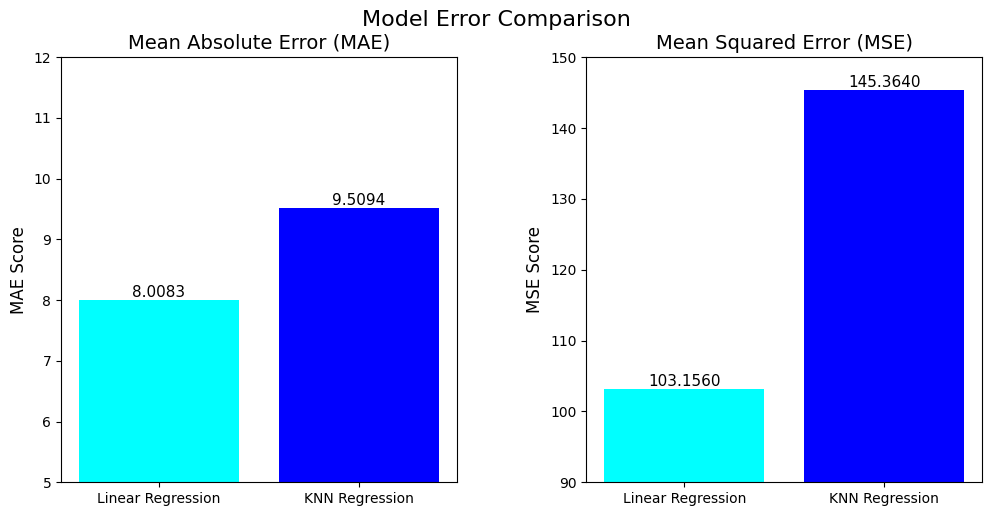

In [175]:
reg_models = ['Linear Regression', 'KNN Regression']
mae_scores = [8.00829, 9.50937]
mse_scores = [103.156,145.364]

plt.figure(figsize=(10,5))
x=np.arange(len(reg_models))

plt.subplot(1,2,1) # Creates a grid of plots (1 row × 2 columns) and selects the 1st position (top-left) for this subplot
bars = plt.bar(reg_models, mae_scores, color=['cyan', 'blue'])  #plt.bar() : Creates a bar chart in matplotlib 
#reg_models: These will be the x-axis labels under each bar 
# mae_scores: These determine the height of each bar (y-values)

for bar in bars:
    height = bar.get_height() # For each bar, gets its height (the y-value, which is the mae score).
    plt.text(bar.get_x() + bar.get_width()/2., # #bar.get_x(): Gets the bar's left-edge x-coordinate. #bar.get_width()/2.: Gets half the bar's width. # bar.get_x() + bar.get_width()/2.: Calculates the center of the bar.
             height,
             f'{height:.4f}',
             ha='center', va='bottom', fontsize=11)
    
plt.ylabel('MAE Score', fontsize=12)
plt.title('Mean Absolute Error (MAE)', fontsize=14)
plt.ylim(5, 12)

plt.subplot(1,2,2)
x=np.arange(len(reg_models))

bars = plt.bar(reg_models, mse_scores, color=['cyan', 'blue'])
for bar in bars:
    height=bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2, height, f'{height:.4f}',
            ha='center', va='bottom',fontsize=11)
plt.ylabel('MSE Score', fontsize=12)
plt.title('Mean Squared Error (MSE)', fontsize=14)
plt.ylim(90, 150)


plt.tight_layout(pad=1.0, w_pad=5.0, h_pad=3.0)    #Automatically adjusts spacing between subplots to prevent overlap
plt.suptitle('Model Error Comparison', fontsize=16, y=1.02)  #suptitle: Super-title (above all subplots)
plt.show()    #Displays the complete figure with all subplots

#plt.tight_layout(pad=3.0, w_pad=2.0, h_pad=2.0) # pad = overall padding # w_pad = horizontal padding between subplots # h_pad = vertical padding between subplots

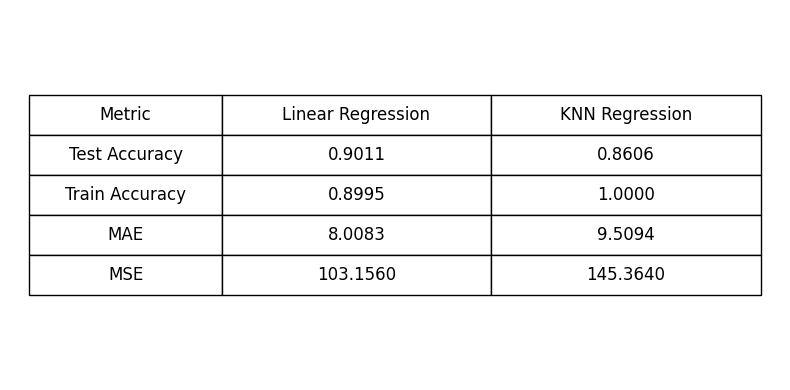

In [184]:
reg_models = ['Linear Regression', 'KNN Regression']
test_scores = [0.90106, 0.86058 ]
train_scores = [0.89947, 1.00000]
mae_scores = [8.00829, 9.50937]
mse_scores = [103.156,145.364]

plt.figure(figsize=(8,4))
plt.axis('off')  # Turns off the regular x and y axes

# Create table data
#Creates the data for the table as a list of lists. First row: Column headers; Subsequent rows: Data values
table_data = [
    ['Metric', 'Linear Regression', 'KNN Regression'],
    ['Test Accuracy', f"{test_scores[0]:.4f}", f"{test_scores[1]:.4f}"],
    ['Train Accuracy', f"{train_scores[0]:.4f}", f"{train_scores[1]:.4f}"],
    ['MAE', f"{mae_scores[0]:.4f}", f"{mae_scores[1]:.4f}"],
    ['MSE', f"{mse_scores[0]:.4f}", f"{mse_scores[1]:.4f}"]
]

# Create table
table = plt.table(cellText=table_data,           #cellText=table_data: Uses our prepared data.
                 loc='center',                   #loc='center': Centers the table in the subplot.
                 cellLoc='center',               #cellLoc='center': Centers text within each cell.
                 colWidths=[0.25, 0.35, 0.35])   #colWidths=[0.25, 0.25, 0.25]: Sets column widths

# Style table
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 2)

# Adjust layout
plt.tight_layout()
plt.show()

In [188]:
print('''In the above table, KNN regression model overfits due to higher training accuracy but lower testing accuracy.
However, linear regression model fits best, as both the trainig and testingy accuracy are similar and near to 1.
Therefore, Linear regression model performs better than KNN regression model on the given data for machine learning.
''')

In the above table, KNN regression model overfits due to higher training accuracy but lower testing accuracy.
However, linear regression model fits best, as both the trainig and testingy accuracy are similar and near to 1.
Therefore, Linear regression model performs better than KNN regression model on the given data for machine learning.



# Comparison of Logistic Rgeression and KNN Classifier

In [131]:
#plot

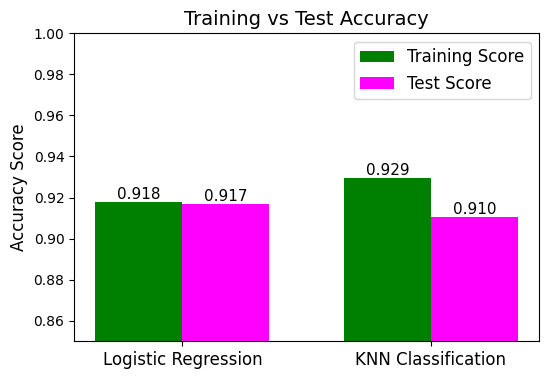

In [182]:
import numpy as np
import matplotlib.pyplot as plt

cls_models = ['Logistic Regression', 'KNN Classification']
test_scores = [0.9170, 0.9104]
train_scores = [0.9178, 0.9295]

plt.figure(figsize=(6,4))
#Accuracy Score
x = np.arange(len(cls_models))
width = 0.35   #Sets the width of each bar to 0.35 units (to prevent overlapping).
bars1 = plt.bar(x - width/2, train_scores, width, label='Training Score', color='green') # x - width/2: Positions bars left of center.train_scores: Heights of the bars (your training accuracy values).
bars2 = plt.bar(x + width/2, test_scores, width, label='Test Score', color='magenta') # x + width/2: Positions bars right of center.test_scores: Heights of the bars (your test accuracy values).

plt.ylabel('Accuracy Score', fontsize=12)  #Labels the y-axis as "Accuracy Score" with font size 12.
plt.title('Training vs Test Accuracy', fontsize=14)
plt.xticks(x, cls_models, fontsize=12) # Places the model names (['Linear Regression', 'KNN Regression']) at positions x = [0, 1] on the x-axis.
plt.ylim(0.85, 1.0)     #Sets the y-axis range from 0.85 to 0.95 
plt.legend(fontsize=12)

for bar in bars1 + bars2:
    height = bar.get_height()                          #bar.get_height(): Gets the MAE value for the current bar.
    plt.text(bar.get_x() + bar.get_width()/2., height, #bar.get_x() + bar.get_width()/2.: Calculates the center of the bar.
             f'{height:.3f}',
             ha='center', va='bottom', fontsize=11)

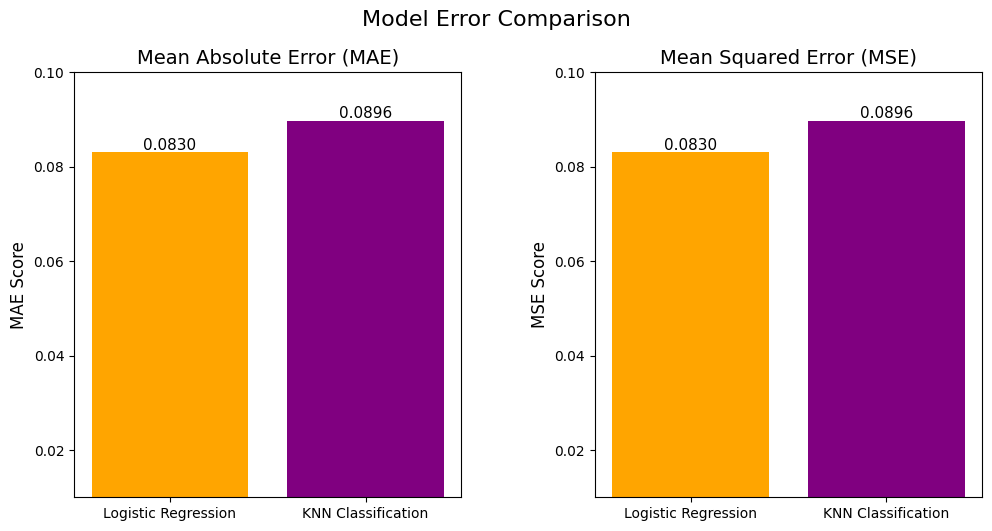

In [178]:
cls_models = ['Logistic Regression', 'KNN Classification']
mae_scores = [0.0830, 0.0896]
mse_scores = [0.0830, 0.0896]

plt.figure(figsize=(10,5))
x=np.arange(len(cls_models))

plt.subplot(1,2,1) # Creates a grid of plots (1 row × 2 columns) and selects the 1st position (top-left) for this subplot
bars = plt.bar(cls_models, mae_scores, color=['orange', 'purple'])  #plt.bar() : Creates a bar chart in matplotlib 
#cls_models: These will be the x-axis labels under each bar 
# mae_scores: These determine the height of each bar (y-values)

for bar in bars:
    height = bar.get_height() # For each bar, gets its height (the y-value, which is the mae score).
    plt.text(bar.get_x() + bar.get_width()/2., # #bar.get_x(): Gets the bar's left-edge x-coordinate. #bar.get_width()/2.: Gets half the bar's width. # bar.get_x() + bar.get_width()/2.: Calculates the center of the bar.
             height,
             f'{height:.4f}',
             ha='center', va='bottom', fontsize=11)
    
plt.ylabel('MAE Score', fontsize=12)
plt.title('Mean Absolute Error (MAE)', fontsize=14)
plt.ylim(.01, .1)

plt.subplot(1,2,2)
x=np.arange(len(cls_models))

bars = plt.bar(cls_models, mse_scores, color=['orange', 'purple'])
for bar in bars:
    height=bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2, height, f'{height:.4f}',
            ha='center', va='bottom',fontsize=11)
plt.ylabel('MSE Score', fontsize=12)
plt.title('Mean Squared Error (MSE)', fontsize=14)
plt.ylim(.01, .1)

plt.tight_layout(pad=1.0,w_pad=5.0)    #Automatically adjusts spacing between subplots to prevent overlap
plt.suptitle('Model Error Comparison', fontsize=16, y=1.05)  #suptitle: Super-title (above all subplots)
plt.show()    #Displays the complete figure with all subplots

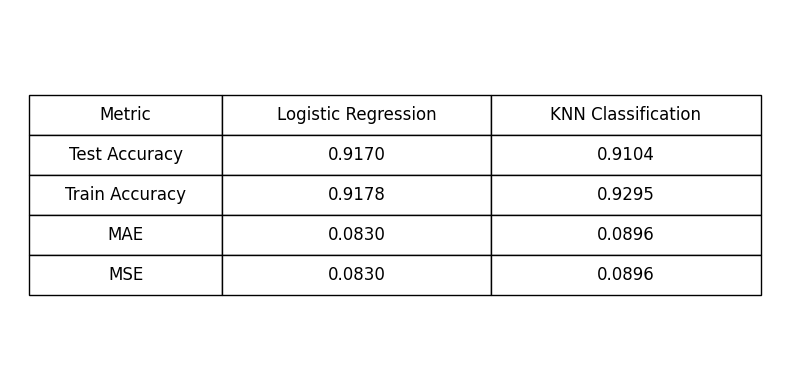

In [183]:
plt.figure(figsize=(8,4))
plt.axis('off')  # Turns off the regular x and y axes

# Create table data
#Creates the data for the table as a list of lists. First row: Column headers; Subsequent rows: Data values
table_data = [
    ['Metric', 'Logistic Regression', 'KNN Classification'],
    ['Test Accuracy', f"{test_scores[0]:.4f}", f"{test_scores[1]:.4f}"],
    ['Train Accuracy', f"{train_scores[0]:.4f}", f"{train_scores[1]:.4f}"],
    ['MAE', f"{mae_scores[0]:.4f}", f"{mae_scores[1]:.4f}"],
    ['MSE', f"{mse_scores[0]:.4f}", f"{mse_scores[1]:.4f}"]
]

# Create table
table = plt.table(cellText=table_data,           #cellText=table_data: Uses our prepared data.
                 loc='center',                   #loc='center': Centers the table in the subplot.
                 cellLoc='center',               #cellLoc='center': Centers text within each cell.
                 colWidths=[0.25, 0.35, 0.35])   #colWidths=[0.25, 0.25, 0.25]: Sets column widths

# Style table
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 2)

# Adjust layout
plt.tight_layout()
plt.show()

In [191]:
print('''Here, both models shows similar performance and low error for given data.
Therefore, both models are equally suitable for machine learning 
for categorical identification on the given data.
''')

Here, both models shows similar performance and low error for given data.
Therefore, both models are equally suitable for machine learning 
for categorical identification on the given data.

